<a href="https://colab.research.google.com/github/IvanSalinas2000/Preprocesamiento-y-clasificacion-de-datos/blob/main/Tarea1/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gutenbergpy


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 8.5 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=323cde3849a89b7412828f06a0caede7ba76a869bce56511d63e08658074be09
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


In [2]:
import gutenbergpy.textget

In [3]:

def obtener_libro(id = 2000):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [4]:
libro_limpio, libro = obtener_libro()
str_libro = libro_limpio.decode()
list_libro = str_libro.split("\n")
libro_filitrado = list(filter(None, list_libro))


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob  # Librería para análisis de sentimientos
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')
# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:

# Configuración inicial
stop_words = set(stopwords.words('spanish'))
lemmatizer = nltk.WordNetLemmatizer()


# Tokenizar el texto
palabras = word_tokenize(str_libro.lower())  # Convierte a minúsculas y tokeniza
palabras = [palabra for palabra in palabras if palabra.isalpha()]  # Filtra palabras alfabéticas

# Aplicar lematización
palabras_lem = [lemmatizer.lemmatize(palabra) for palabra in palabras if palabra not in stop_words]

# Calcular frecuencia de palabras
from collections import Counter
frecuencia_lem = Counter(palabras_lem)


# Mostrar las palabras más comunes (lematización)
print("Palabras más comunes (lematización):")
print(frecuencia_lem.most_common(10))


Palabras más comunes (lematización):
[('don', 2714), ('si', 1959), ('quijote', 1719), ('sancho', 1667), ('tan', 1235), ('señor', 1064), ('así', 1062), ('ser', 1059), ('bien', 1042), ('dijo', 933)]


In [12]:
# Estadísticas descriptivas
def estadisticas_descriptivas(texto):
    palabras = word_tokenize(texto)
    oraciones = nltk.sent_tokenize(texto)
    return {
        "total_palabras": len(palabras),
        "total_oraciones": len(oraciones),
        "longitud_media_palabras": sum(len(p) for p in palabras) / len(palabras) if palabras else 0,
        "longitud_media_oraciones": sum(len(o) for o in oraciones) / len(oraciones) if oraciones else 0
    }

stats = estadisticas_descriptivas(str_libro)
print("Estadísticas Descriptivas del Texto:")
print(stats)


Estadísticas Descriptivas del Texto:
{'total_palabras': 444430, 'total_oraciones': 9513, 'longitud_media_palabras': 3.8667866705667935, 'longitud_media_oraciones': 220.44150110375276}


In [13]:
# Análisis de sentimientos
def analizar_sentimientos(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    sentimiento = "Positivo" if polaridad > 0 else "Negativo" if polaridad < 0 else "Neutral"
    return polaridad, sentimiento

polaridad, sentimiento = analizar_sentimientos(str_libro)
print(f"Análisis de Sentimientos:")
print(f"Polaridad: {polaridad}")
print(f"Sentimiento General: {sentimiento}")

Análisis de Sentimientos:
Polaridad: 0.00875050004706322
Sentimiento General: Positivo


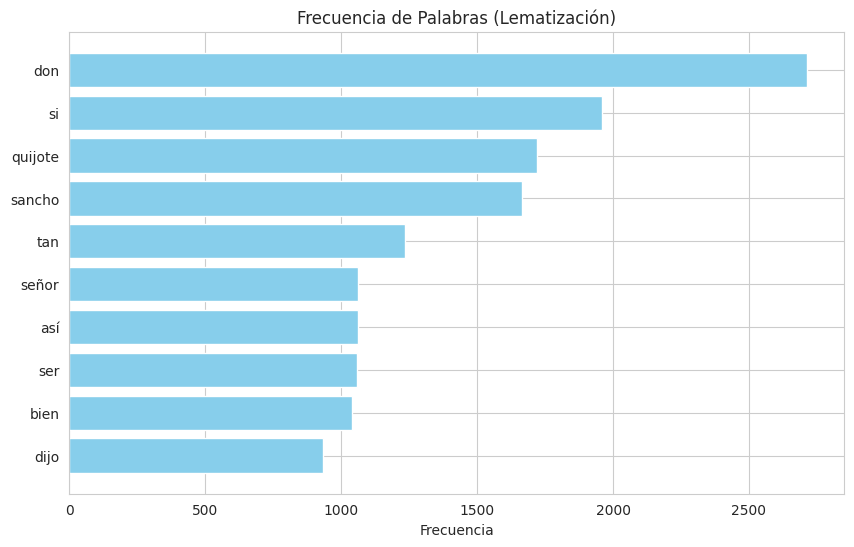

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")  # Estilo para mejorar la visualización

def graficar_frecuencia_palabras(frecuencia, titulo, num_palabras=10):
    palabras, conteos = zip(*frecuencia.most_common(num_palabras))
    plt.figure(figsize=(10, 6))
    plt.barh(palabras, conteos, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(titulo)
    plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la palabra más frecuente arriba
    plt.show()


# Visualizar palabras más comunes usando lematización
graficar_frecuencia_palabras(frecuencia_lem, "Frecuencia de Palabras (Lematización)", 10)

Bigramas más comunes (Lematización):
[(('don', 'quijote'), 1710), (('sancho', 'panza'), 277), (('vuesa', 'merced'), 198), (('señor', 'don'), 179), (('quijote', 'mancha'), 144), (('caballeros', 'andante'), 128), (('don', 'fernando'), 127), (('sancho', 'don'), 125), (('dulcinea', 'toboso'), 117), (('caballero', 'andante'), 116)]

Trigramas más comunes (Lematización):
[(('don', 'quijote', 'mancha'), 144), (('señor', 'don', 'quijote'), 142), (('don', 'quijote', 'sancho'), 76), (('don', 'quijote', 'dijo'), 60), (('señora', 'dulcinea', 'toboso'), 46), (('caballero', 'triste', 'figura'), 36), (('dijo', 'don', 'quijote'), 33), (('merced', 'señor', 'don'), 32), (('vuesa', 'merced', 'señor'), 29), (('respondió', 'don', 'quijote'), 26)]


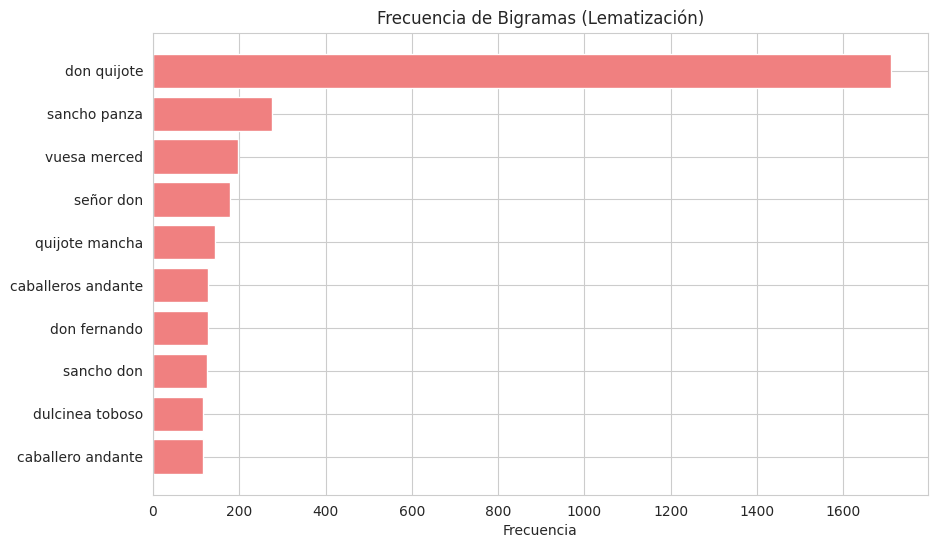

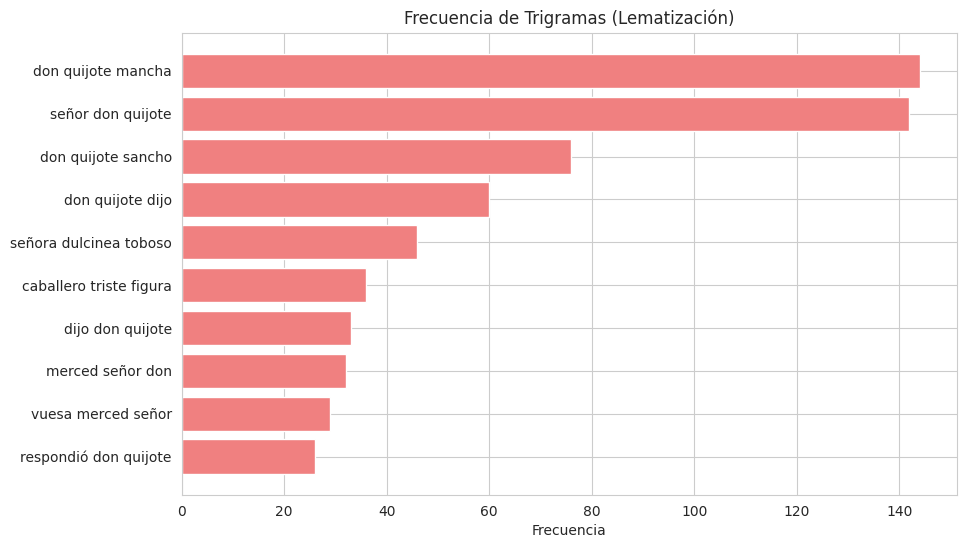

In [16]:
from nltk.util import ngrams

def frecuencia_ngramas(palabras, n=2):
    n_grams = ngrams(palabras, n)
    frecuencia_ngramas = Counter(n_grams)
    return frecuencia_ngramas

# Calcular bigramas y trigramas
bigramas = frecuencia_ngramas(palabras_lem, 2)
trigramas = frecuencia_ngramas(palabras_lem, 3)

# Mostrar los bigramas y trigramas más comunes
print("Bigramas más comunes (Lematización):")
print(bigramas.most_common(10))

print("\nTrigramas más comunes (Lematización):")
print(trigramas.most_common(10))


def graficar_frecuencia_ngramas(frecuencia, titulo, num_ngramas=10):
    ngramas, conteos = zip(*frecuencia.most_common(num_ngramas))
    etiquetas = [' '.join(ngram) for ngram in ngramas]  # Convertir tuplas a cadenas
    plt.figure(figsize=(10, 6))
    plt.barh(etiquetas, conteos, color='lightcoral')
    plt.xlabel('Frecuencia')
    plt.title(titulo)
    plt.gca().invert_yaxis()
    plt.show()

# Visualizar bigramas y trigramas más comunes
graficar_frecuencia_ngramas(bigramas, "Frecuencia de Bigramas (Lematización)", 10)
graficar_frecuencia_ngramas(trigramas, "Frecuencia de Trigramas (Lematización)", 10)


Análisis de Signos de Puntuación:
Total de signos de puntuación: 58096
Proporción de signos de puntuación en el texto: 0.0275
Frecuencia de los signos más comunes:
[(',', 40277), ('.', 8212), (';', 4802), (':', 2047), ('?', 960), ("'", 704), ('!', 693), ('"', 166), ('-', 109), ('(', 62)]


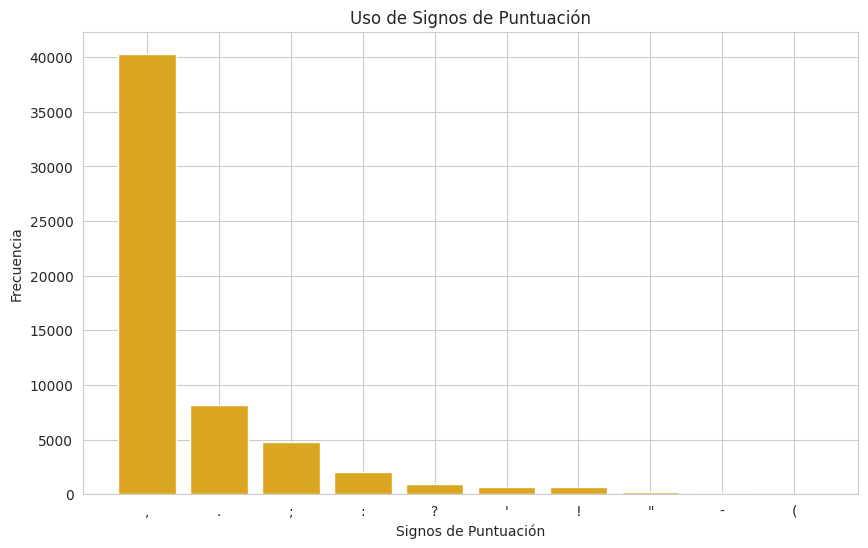

In [17]:
# Análisis de signos de puntuación
import string

def analizar_signos_puntuacion(texto):
    # Crear un diccionario para contar los signos de puntuación
    signos = string.punctuation
    conteo_signos = Counter(char for char in texto if char in signos)
    total_signos = sum(conteo_signos.values())
    return {
        "frecuencia": conteo_signos,
        "total_signos": total_signos,
        "proporcion_signos": total_signos / len(texto) if texto else 0
    }

# Analizar signos de puntuación
analisis_puntuacion = analizar_signos_puntuacion(str_libro)
print("Análisis de Signos de Puntuación:")
print(f"Total de signos de puntuación: {analisis_puntuacion['total_signos']}")
print(f"Proporción de signos de puntuación en el texto: {analisis_puntuacion['proporcion_signos']:.4f}")
print(f"Frecuencia de los signos más comunes:")
print(analisis_puntuacion["frecuencia"].most_common(10))

# Graficar uso de signos de puntuación
def graficar_signos_puntuacion(conteo_signos, titulo):
    signos, conteos = zip(*conteo_signos.most_common(10))
    plt.figure(figsize=(10, 6))
    plt.bar(signos, conteos, color='goldenrod')
    plt.xlabel('Signos de Puntuación')
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.show()

graficar_signos_puntuacion(analisis_puntuacion["frecuencia"], "Uso de Signos de Puntuación")


#La odisea

In [18]:
 def obtener_libro(id = 58221):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [19]:
libro_limpio, libro = obtener_libro()
str_libro = libro_limpio.decode()
list_libro = str_libro.split("\n")
libro_filitrado = list(filter(None, list_libro))

In [20]:

# Configuración inicial
stop_words = set(stopwords.words('spanish'))
lemmatizer = nltk.WordNetLemmatizer()


# Tokenizar el texto
palabras = word_tokenize(str_libro.lower())  # Convierte a minúsculas y tokeniza
palabras = [palabra for palabra in palabras if palabra.isalpha()]  # Filtra palabras alfabéticas

# Aplicar lematización
palabras_lem = [lemmatizer.lemmatize(palabra) for palabra in palabras if palabra not in stop_words]

# Calcular frecuencia de palabras
from collections import Counter
frecuencia_lem = Counter(palabras_lem)


# Mostrar las palabras más comunes (lematización)
print("Palabras más comunes (lematización):")
print(frecuencia_lem.most_common(10))


Palabras más comunes (lematización):
[('á', 7038), ('ulises', 1688), ('telémaco', 716), ('así', 538), ('pues', 524), ('si', 511), ('pretendientes', 501), ('júpiter', 481), ('hijo', 477), ('hombre', 412)]


In [21]:
# Estadísticas descriptivas
def estadisticas_descriptivas(texto):
    palabras = word_tokenize(texto)
    oraciones = nltk.sent_tokenize(texto)
    return {
        "total_palabras": len(palabras),
        "total_oraciones": len(oraciones),
        "longitud_media_palabras": sum(len(p) for p in palabras) / len(palabras) if palabras else 0,
        "longitud_media_oraciones": sum(len(o) for o in oraciones) / len(oraciones) if oraciones else 0
    }

stats = estadisticas_descriptivas(str_libro)
print("Estadísticas Descriptivas del Texto:")
print(stats)

Estadísticas Descriptivas del Texto:
{'total_palabras': 203915, 'total_oraciones': 4637, 'longitud_media_palabras': 3.904744623985484, 'longitud_media_oraciones': 210.16670260944576}


In [22]:
# Análisis de sentimientos
def analizar_sentimientos(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    sentimiento = "Positivo" if polaridad > 0 else "Negativo" if polaridad < 0 else "Neutral"
    return polaridad, sentimiento

polaridad, sentimiento = analizar_sentimientos(str_libro)
print(f"Análisis de Sentimientos:")
print(f"Polaridad: {polaridad}")
print(f"Sentimiento General: {sentimiento}")

Análisis de Sentimientos:
Polaridad: -0.34406647013667396
Sentimiento General: Negativo


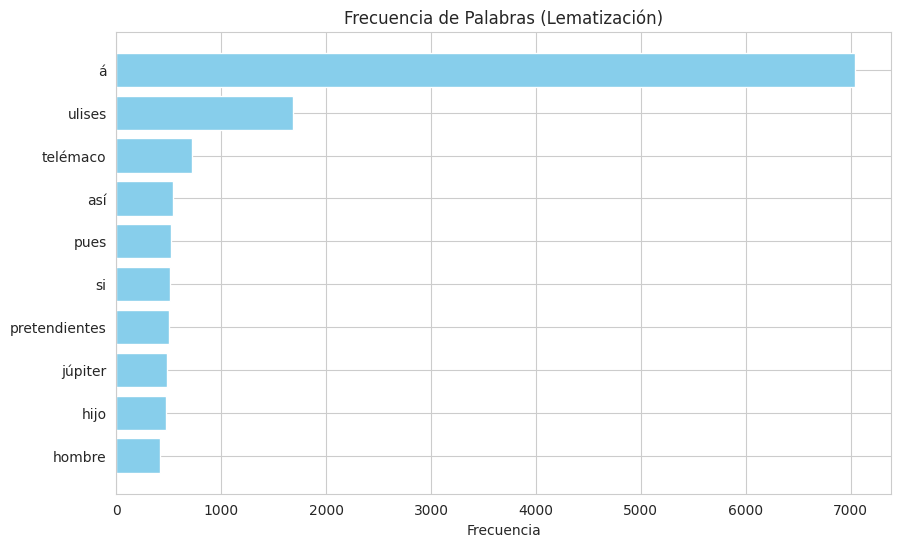

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")  # Estilo para mejorar la visualización

def graficar_frecuencia_palabras(frecuencia, titulo, num_palabras=10):
    palabras, conteos = zip(*frecuencia.most_common(num_palabras))
    plt.figure(figsize=(10, 6))
    plt.barh(palabras, conteos, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(titulo)
    plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la palabra más frecuente arriba
    plt.show()


# Visualizar palabras más comunes usando lematización
graficar_frecuencia_palabras(frecuencia_lem, "Frecuencia de Palabras (Lematización)", 10)

Bigramas más comunes (Lematización):
[(('á', 'ulises'), 372), (('á', 'telémaco'), 240), (('á', 'pretendientes'), 129), (('á', 'patria'), 127), (('á', 'casa'), 125), (('á', 'penélope'), 125), (('ulises', 'á'), 115), (('divinal', 'ulises'), 96), (('á', 'dice'), 91), (('junto', 'á'), 88)]

Trigramas más comunes (Lematización):
[(('respondióle', 'ingenioso', 'ulises'), 38), (('paciente', 'divinal', 'ulises'), 35), (('deidad', 'brillantes', 'ojos'), 32), (('minerva', 'deidad', 'brillantes'), 30), (('voy', 'á', 'decir'), 27), (('respondióle', 'prudente', 'telémaco'), 24), (('aurora', 'rosáceos', 'dedos'), 22), (('á', 'patria', 'tierra'), 22), (('dice', 'ulises', 'á'), 22), (('darse', 'á', 'conocer'), 21)]


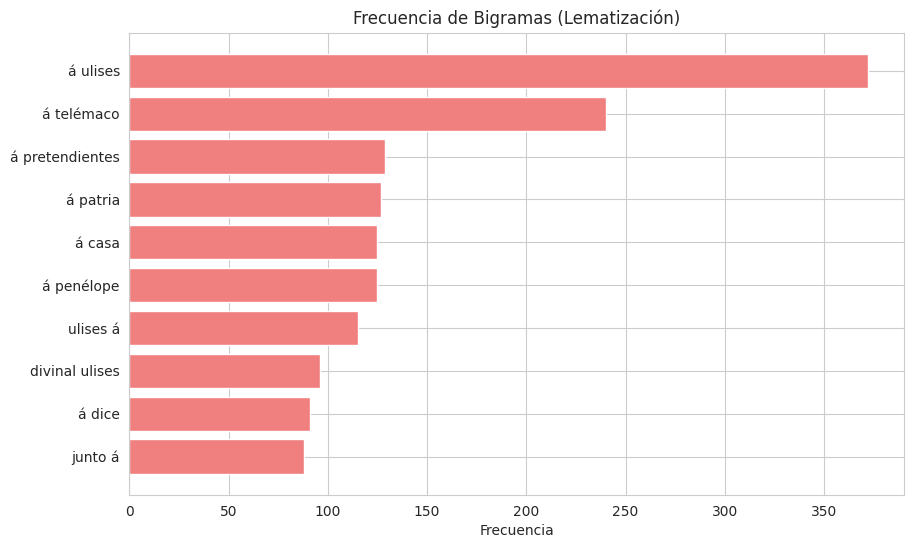

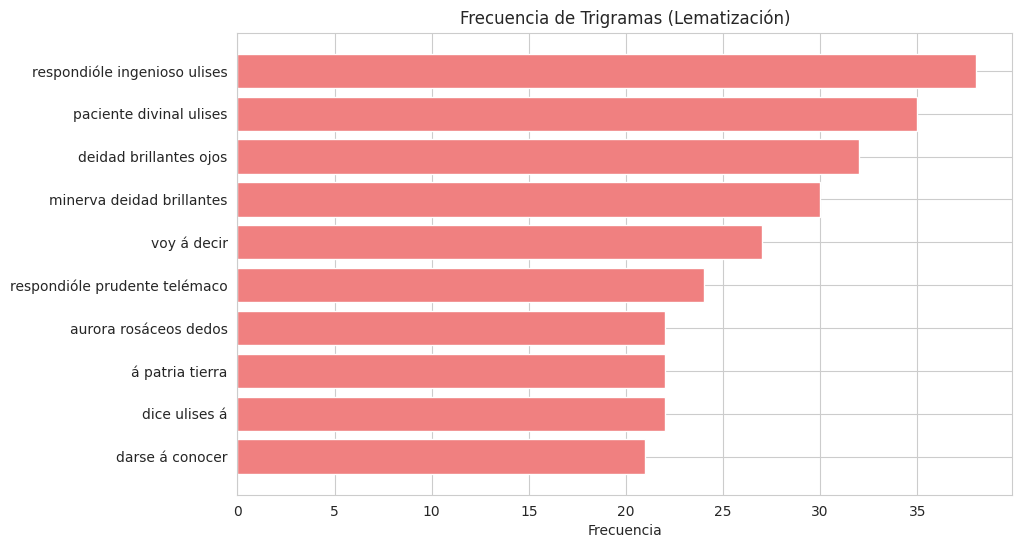

In [24]:
from nltk.util import ngrams

def frecuencia_ngramas(palabras, n=2):
    n_grams = ngrams(palabras, n)
    frecuencia_ngramas = Counter(n_grams)
    return frecuencia_ngramas

# Calcular bigramas y trigramas
bigramas = frecuencia_ngramas(palabras_lem, 2)
trigramas = frecuencia_ngramas(palabras_lem, 3)

# Mostrar los bigramas y trigramas más comunes
print("Bigramas más comunes (Lematización):")
print(bigramas.most_common(10))

print("\nTrigramas más comunes (Lematización):")
print(trigramas.most_common(10))


def graficar_frecuencia_ngramas(frecuencia, titulo, num_ngramas=10):
    ngramas, conteos = zip(*frecuencia.most_common(num_ngramas))
    etiquetas = [' '.join(ngram) for ngram in ngramas]  # Convertir tuplas a cadenas
    plt.figure(figsize=(10, 6))
    plt.barh(etiquetas, conteos, color='lightcoral')
    plt.xlabel('Frecuencia')
    plt.title(titulo)
    plt.gca().invert_yaxis()
    plt.show()

# Visualizar bigramas y trigramas más comunes
graficar_frecuencia_ngramas(bigramas, "Frecuencia de Bigramas (Lematización)", 10)
graficar_frecuencia_ngramas(trigramas, "Frecuencia de Trigramas (Lematización)", 10)

Análisis de Signos de Puntuación:
Total de signos de puntuación: 30573
Proporción de signos de puntuación en el texto: 0.0311
Frecuencia de los signos más comunes:
[(',', 17454), ('.', 4749), (';', 3410), (':', 1601), (')', 712), ('-', 682), ('(', 643), ('!', 560), ('?', 251), ('_', 230)]


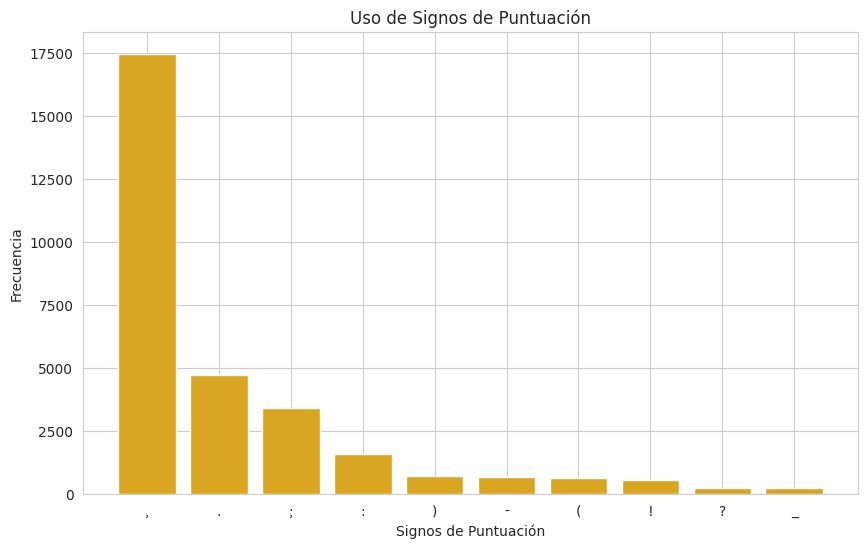

In [25]:
# Análisis de signos de puntuación
import string

def analizar_signos_puntuacion(texto):
    # Crear un diccionario para contar los signos de puntuación
    signos = string.punctuation
    conteo_signos = Counter(char for char in texto if char in signos)
    total_signos = sum(conteo_signos.values())
    return {
        "frecuencia": conteo_signos,
        "total_signos": total_signos,
        "proporcion_signos": total_signos / len(texto) if texto else 0
    }

# Analizar signos de puntuación
analisis_puntuacion = analizar_signos_puntuacion(str_libro)
print("Análisis de Signos de Puntuación:")
print(f"Total de signos de puntuación: {analisis_puntuacion['total_signos']}")
print(f"Proporción de signos de puntuación en el texto: {analisis_puntuacion['proporcion_signos']:.4f}")
print(f"Frecuencia de los signos más comunes:")
print(analisis_puntuacion["frecuencia"].most_common(10))

# Graficar uso de signos de puntuación
def graficar_signos_puntuacion(conteo_signos, titulo):
    signos, conteos = zip(*conteo_signos.most_common(10))
    plt.figure(figsize=(10, 6))
    plt.bar(signos, conteos, color='goldenrod')
    plt.xlabel('Signos de Puntuación')
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.show()

graficar_signos_puntuacion(analisis_puntuacion["frecuencia"], "Uso de Signos de Puntuación")
